## Problem Statement

#### Neural Network for FashionMNIST dataset

## Install Skorch

In [ ]:
!pip install skorch

## Load Libraries

In [ ]:
## Python Libraries
import matplotlib.pyplot as plt
import seaborn as sns
rom sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

## Skorch Libaries
from skorch import NeuralNetClassifier

## Neural Network
import torch as tr
import torchvision.datasets as datasets
from torchvision import models
import torchvision.transforms as trnsform
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Check Tourch Version

In [ ]:
print("Using torch", tr.__version__)

Using torch 1.13.0+cu116


## Reference

* 1) https://www.marktechpost.com/2021/01/09/getting-started-with-pytorch-in-google-collab-with-free-gpu/

## Checking Cuda Support (GPU)

In [ ]:
print(tr.cuda.device_count())
print(tr.cuda.get_device_name(0))

1
Tesla T4


#Assign cuda GPU located at location '0' to a variable


In [ ]:
cudad = tr.device('cuda:0')
cudad

device(type='cuda', index=0)

## Setting up seed to be reproducible

Reference 2)
https://stackoverflow.com/questions/66130547/what-does-the-difference-between-torch-backends-cudnn-deterministic-true-and

In [ ]:
tr.cuda.manual_seed(1)
tr.backends.cudnn.deterministic = True
tr.backends.cudnn.benchmark = False

## Load Dataset

* Ref -> https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10

In [ ]:
## ToTenssor Convert Image into Pixel Range of [0,255] and images are normalized to reduce the skewness and increase model abilty to learn faster.
tranformercustom = trnsform.Compose([trnsform.ToTensor(),trnsform.Normalize((0.1,), (0.3,))])

traindata = datasets.MNIST(root='./data',train=True,download=True,transform=tranformercustom)
## Test Data
testdata = datasets.MNIST(root='./data',train=False,download=True,transform=tranformercustom)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Train Data

* Train Data has 60000 Datapoints

In [ ]:
traindata

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1,), std=(0.3,))
           )

## Test Data

* Test Data has 10000 Datapoints

In [ ]:
testdata

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1,), std=(0.3,))
           )

## Loading Data that is Downloaded

In [ ]:
X_trian = tr.utils.data.DataLoader(traindata, batch_size=32, shuffle=True, num_workers=2)
X_test = tr.utils.data.DataLoader(testdata, batch_size=32, shuffle=True, num_workers=2)

## Printing Batch and Labels size

In [ ]:
batch, labels = next(iter(X_trian))

In [ ]:
print("Batch size", batch.size()[0])
print("Image size", batch.size()[2],"x",batch.size()[3])
print("Image Channel", batch.size()[1])
print("Label size,", labels.size())

Batch size 32
Image size 28 x 28
Image Channel 1
Label size, torch.Size([32])


## Classes of Dataset

In [ ]:
classes=traindata.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Ploting Images

* Ref Image plot --> https://stackoverflow.com/questions/53623472/how-do-i-display-a-single-image-in-pytorch

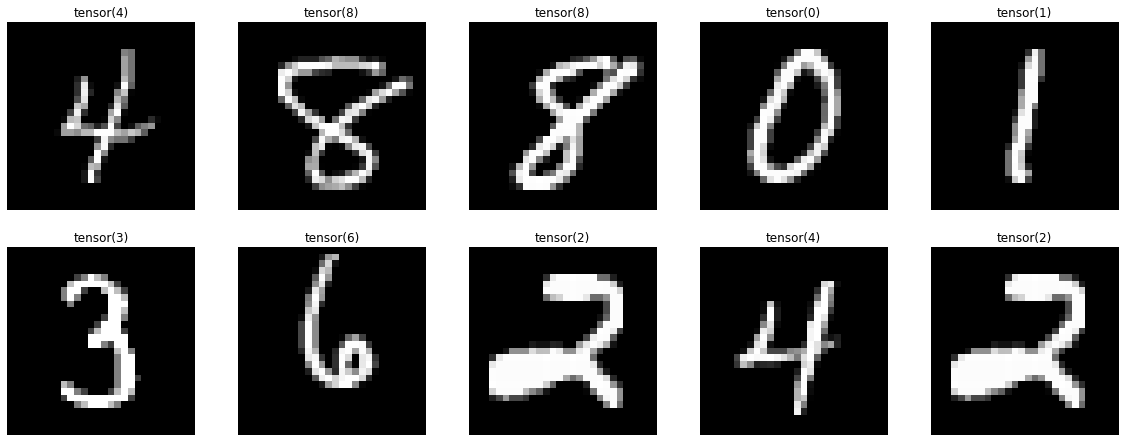

In [ ]:
## Creating 
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(batch),10))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(batch[i].squeeze() , cmap='gray')
    plt.title(labels[i])
    plt.axis('off')     
plt.show()

## Labels

### Extraction labels from each traindata for testing model

#### Single line loop --> https://blog.finxter.com/python-one-line-for-loop-a-simple-tutorial/

In [ ]:
y_train = np.array([y for x, y in iter(traindata)])
y_test = np.array([y for x, y in iter(testdata)])

## Plotting The Labels

In [ ]:
import plotly.express as px

## This show that dataset is evenly distributed

In [ ]:
labelunique, labelcount = np.unique(y_train, return_counts=True)
labeluniquet, labeluniquet = np.unique(y_test, return_counts=True)

## Distribution of Label counts in Training and Test Dataset
fig = px.pie(labelunique, values=labelcount, names=labelunique,
             title='Distribution of Label counts in Training Dataset' ,
             color_discrete_sequence=px.colors.sequential.Magma_r)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Fashion MNIST Model

In [ ]:
class MNISTnetworkntnetwork(nn.Module):
  def __init__(self,dropout=0.2,dropout2=0.3, num_units=10,out_units=10,fout_units=10,nonlinear=F.relu):
    super(MNISTnetworkntnetwork, self).__init__()
    ## Convulution layers
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=num_units,kernel_size=5,stride=1)
    self.nonlin1 = nonlinear
    self.conv2 = nn.Conv2d(in_channels=num_units,out_channels=out_units,kernel_size=5,stride=1)
    self.nonlin2 = nonlinear
    self.conv3 = nn.Conv2d(in_channels=out_units,out_channels=fout_units,kernel_size=2,stride=1)
    self.nonlin2 = nonlinear
    ## FLatten Layers1
    self.flatten1 = nn.Linear(fout_units*3*3,200)
    ## FLatten Layers
    self.flatten2 = nn.Linear(200,60)
    self.output = nn.Linear(60,10)
    ## dropout layers
    self.dropout = nn.Dropout2d(p=dropout)
    ## dropout1 layers
    self.dropout1 = nn.Dropout2d(p=dropout2)
    ## out
    self.outloss = nn.Softmax(dim = 1)

  def forward(self,img, **kwargs):
  ## Layer 1 
    img = self.nonlin1(F.max_pool2d(self.conv1(img),kernel_size=2,stride=2))
    ## Layer 2
    img = self.nonlin2(F.max_pool2d(self.conv2(img),kernel_size=2,stride=2))
    ## Layer 3
    img = self.nonlin2(self.conv3(img))
    ## Dropout layer
    img = self.dropout(img)
    ## Reshape Image
    img = img.view(-1,fout_units*3*3)
    ## FLatten Layer 1
    img = self.flatten1(img)
    ## FLatten Layer 2
    img = self.flatten2(img)
    ## Drop out layer 2
    img = self.dropout1(img)
    ## Output layer
    img = self.output(img)
    ## softmax for multi classification
    img = self.outloss(img)

    return img

## Compiling Model

In [ ]:
## Intilize Default Parameters
epochs = 10
lr = 0.0001
max_epochs = 10
batch_size = 32
loss = nn.CrossEntropyLoss
module__optimizer = optim.Adam
mnstnet = NeuralNetClassifier(fashionmsntnetwork,max_epochs=max_epochs,lr=lr,batch_size=batch_size,optimizer=module__optimizer,criterion=loss)

## GridSearch Implementation

## * What is GridSearch --> https://medium.com/fintechexplained/what-is-grid-search-c01fe886ef0a
## * Grid Search Implmenetation on skroch --> https://github.com/skorch-dev/skorch/issues/443

## Hyperparameter Search --> https://github.com/skorch-dev/skorch/issues/443

In [ ]:
## Dictionary consisting of all parameters to run on grid search
params = {
    'lr': [0.0001,0.001],
    'max_epochs': [15,20],
    'batch_size': [32,64],
    'module__optimizer': [optim.Adam,optim.RMSprop],
    'module__nonlinear': [nn.ReLU(), nn.Softmax(dim = 1)],
    'module__num_units': [10],
    'module__out_units': [20, 30],
    'module__fout_units': [40, 50],
    }

## Train Model

In [ ]:
gs_fasion = GridSearchCV(mnstnet, params, refit=False, cv=3, scoring='accuracy', verbose = 2)
gs_fasion.fit(traindata,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END batch_size=32, lr=0.0001, max_epochs=15, module__fout_units=40, module__nonlinear=ReLU(), module__num_units=10, module__optimizer=<class 'torch.optim.adam.Adam'>, module__out_units=20; total time=  11.4s
[CV] END batch_size=32, lr=0.0001, max_epochs=15, module__fout_units=40, module__nonlinear=ReLU(), module__num_units=10, module__optimizer=<class 'torch.optim.adam.Adam'>, module__out_units=20; total time=   9.3s
[CV] END batch_size=32, lr=0.0001, max_epochs=15, module__fout_units=40, module__nonlinear=ReLU(), module__num_units=10, module__optimizer=<class 'torch.optim.adam.Adam'>, module__out_units=20; total time=   9.1s
[CV] END batch_size=32, lr=0.0001, max_epochs=15, module__fout_units=40, module__nonlinear=ReLU(), module__num_units=10, module__optimizer=<class 'torch.optim.adam.Adam'>, module__out_units=30; total time=   9.2s
[CV] END batch_size=32, lr=0.0001, max_epochs=15, module__fout_units=40, module__nonl

GridSearchCV(cv=3,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.fashionmsntnetwork'>,
),
             param_grid={'batch_size': [32, 64], 'lr': [0.0001, 0.001],
                         'max_epochs': [15, 20], 'module__fout_units': [40, 50],
                         'module__nonlinear': [ReLU(), Softmax(dim=1)],
                         'module__num_units': [10],
                         'module__optimizer': [<class 'torch.optim.adam.Adam'>,
                                               <class 'torch.optim.rmsprop.RMSprop'>],
                         'module__out_units': [20, 30]},
             refit=False, scoring='accuracy', verbose=2)

## Best Parameters

In [ ]:
gs_fasion.best_params_

{'batch_size': 32,
 'lr': 0.0001,
 'max_epochs': 15,
 'module__fout_units': 40,
 'module__nonlinear': ReLU(),
 'module__num_units': 10,
 'module__optimizer': torch.optim.adam.Adam,
 'module__out_units': 20}

## Train Model Using Best Parameters

In [ ]:
class MNISTnetwork(nn.Module):
  def __init__(self,dropout=0.2,dropout2=0.3, num_units=10,out_units=10,fout_units=10,nonlinear=F.relu):
    super(MNISTnetwork, self).__init__()
    ## Convulution layers
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=10,kernel_size=5,stride=1)
    self.nonlin1 = F.relu
    self.conv2 = nn.Conv2d(in_channels=10,out_channels=20,kernel_size=5,stride=1)
    self.nonlin2 = F.relu
    self.conv3 = nn.Conv2d(in_channels=20,out_channels=40,kernel_size=2,stride=1)
    self.nonlin2 = F.relu
    ## FLatten Layers1
    self.flatten1 = nn.Linear(40*3*3,200)
    ## FLatten Layers
    self.flatten2 = nn.Linear(200,60)
    self.output = nn.Linear(60,10)
    ## dropout layers
    self.dropout = nn.Dropout2d(p=dropout)
    ## dropout1 layers
    self.dropout1 = nn.Dropout2d(p=dropout2)
    ## out
    self.outloss = nn.Softmax(dim = 1)

  def forward(self,img, **kwargs):
  ## Layer 1 
    img = self.nonlin1(F.max_pool2d(self.conv1(img),kernel_size=2,stride=2))
    ## Layer 2
    img = self.nonlin2(F.max_pool2d(self.conv2(img),kernel_size=2,stride=2))
    ## Layer 3
    img = self.nonlin2(self.conv3(img))
    ## Dropout layer
    img = self.dropout(img)
    ## Reshape Image
    img = img.view(-1,40*3*3)
    ## FLatten Layer 1
    img = self.flatten1(img)
    ## FLatten Layer 2
    img = self.flatten2(img)
    ## Drop out layer 2
    img = self.dropout1(img)
    ## Output layer
    img = self.output(img)
    ## softmax for multi classification
    img = self.outloss(img)

    return img

In [ ]:
## Complie Model with best Parameters
MNISTnet = NeuralNetClassifier(MNISTnetwork,max_epochs=20,lr=0.0001,batch_size=32,optimizer=optim.Adam,criterion=nn.CrossEntropyLoss)
## Train Model
MNISTnet.fit(traindata,y_train)

  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        1.7173       0.9068        1.5584  26.2221
      2        1.5587       0.9371        1.5278  24.9443
      3        1.5314       0.9516        1.5119  24.8250
      4        1.5173       0.9597        1.5024  24.8430
      5        1.5085       0.9656        1.4974  25.9438
      6        1.5028       0.9710        1.4919  25.9668
      7        1.4982       0.9732        1.4897  24.9923
      8        1.4956       0.9746        1.4879  25.0384
      9        1.4929       0.9762        1.4861  25.0890
     10        1.4905       0.9770        1.4851  26.0367
     11        1.4892       0.9781        1.4837  25.7969
     12        1.4875       0.9778        1.4835  25.0580
     13        1.4867       0.9780        1.4829  24.8288
     14        1.4852       0.9798        1.4825  24.9688
     15        1.4839       0.9796        1.4821  25.7128
     16       

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MNISTnetwork(
    (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (conv3): Conv2d(20, 40, kernel_size=(2, 2), stride=(1, 1))
    (flatten1): Linear(in_features=360, out_features=200, bias=True)
    (flatten2): Linear(in_features=200, out_features=60, bias=True)
    (output): Linear(in_features=60, out_features=10, bias=True)
    (dropout): Dropout2d(p=0.2, inplace=False)
    (dropout1): Dropout2d(p=0.3, inplace=False)
    (outloss): Softmax(dim=1)
  ),
)

## Plot Loss

* Plotting Training and Test Loss in Skorch : --> https://stackoverflow.com/questions/61354529/get-the-validation-train-loss-from-skorch-fit

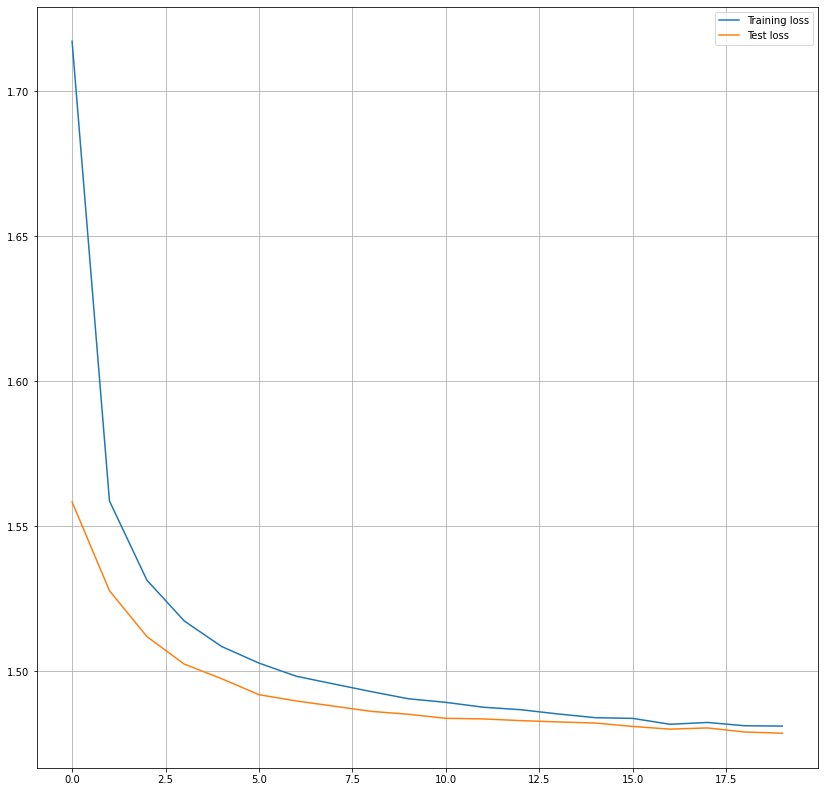

In [ ]:
trainloss = MNISTnet.history[:, 'train_loss']
testloss = MNISTnet.history[:, 'valid_loss']
plt.figure(figsize=(14,14))    
plt.plot(trainloss, label='Training loss')
plt.plot(testloss, label='Test loss')
plt.legend()
plt.grid()

## Prediction

In [ ]:
y_pred = MNISTnet.predict(testdata)

## **Confusion Matrix**

Method of evlauting the perfomace of the model based on following conditions:

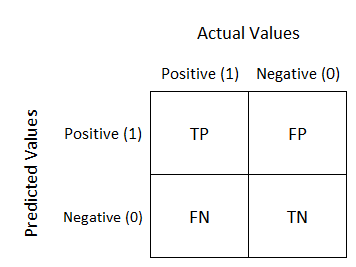


 
#### 11) Refernce: What is confusion matrix? --> https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
#### 12) Refrence: Confusion matrix plot --> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix



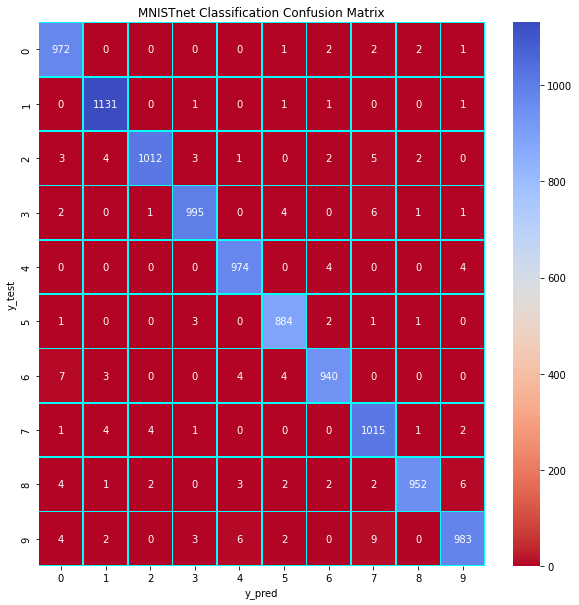

In [ ]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, y_pred)
# Visualization:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='coolwarm_r')
plt.title('MNISTnet Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## **Classification Report**

It is an another method of evaluation which is used to find the precision recall and f1-score based on following formulas:

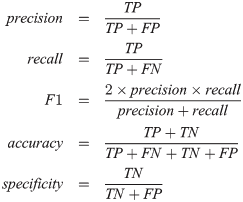

#### Refernce: 13) Classification report plot --> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

#### Reference: 14) What is classification report --> https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec#:~:text=F1%2Dscore%20equals%20precision%20and%20recall%20if%20the%20two%20input,examples%20they%20start%20to%20vary.

In [ ]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_test, y_pred)
# Visualization:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='coolwarm_r')
plt.title('MNISTnet Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
## CLassfication Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Image Prediction

In [ ]:
batch, labels = next(iter(X_test))
batch, labels = batch.cuda(), labels.cuda()

In [ ]:
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

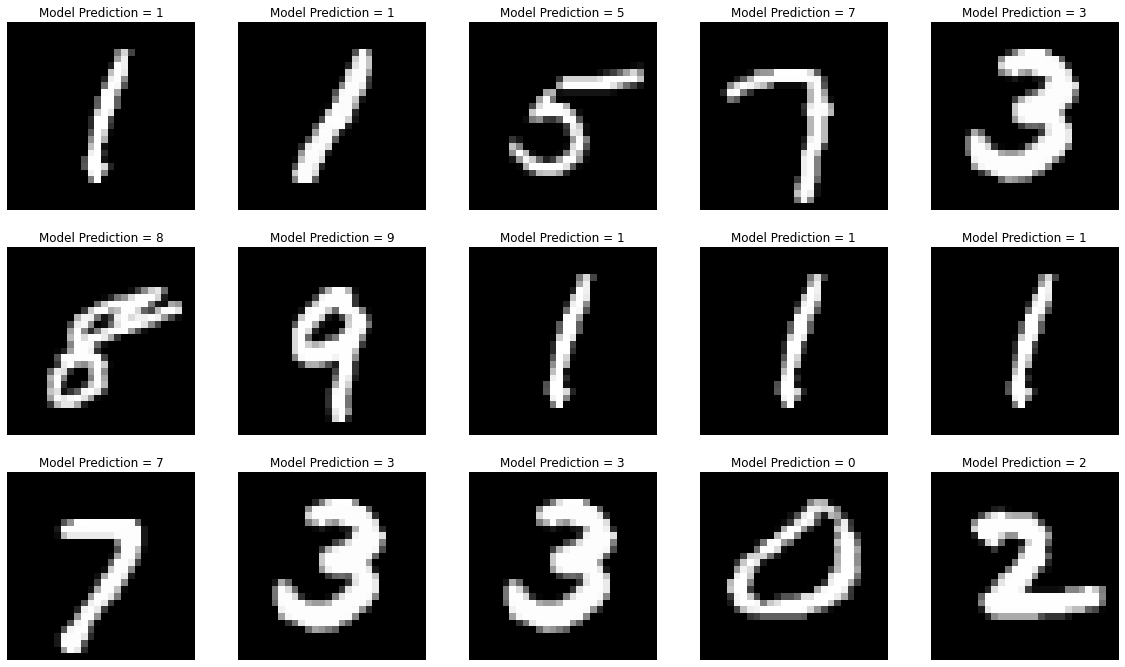

In [ ]:
## Creating 
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(batch),15))) : 
    prediction = MNISTnet.predict(batch[i])
    plt.subplot(5,5,n+1)
    plt.imshow(batch[i].cpu().squeeze() , cmap='gray')
    plt.title('Model Prediction = {}'.format(prediction[0]))
    plt.axis('off')     
plt.show()